## Research question/interests
The popularity of a programming language to the programmer's salary and if certain languages generally complement eachother in industry? Are niche languages paid more? What's the most popular poorly paid programming language? As well as trends over the survey, if certain languages are becoming more popular and others fading.

In [18]:
import os # to get to document and open it
import pandas as pd # for analysis
import numpy as np # also for analysis
import seaborn as sns # for visual analysis
import matplotlib.pyplot as plt #for visual analysis

import zipfile

To load the raw csv data into a pandas dataframe.

In [19]:
with zipfile.ZipFile('../data/raw/survey_results_public_2019.csv.zip') as myzip:
    data2019 = myzip.open('survey_results_public_2019.csv')
    
with zipfile.ZipFile('../data/raw/survey_results_public_2018.csv.zip') as myzip:
    data2018 = myzip.open('survey_results_public_2018.csv')

with zipfile.ZipFile('../data/raw/survey_results_public_2017.csv.zip') as myzip:
    data2017 = myzip.open('survey_results_public_2017.csv')

In [20]:
df = pd.read_csv('../data/raw/survey_results_public_2021.csv') #Loading 2021 data
df2020 = pd.read_csv('../data/raw/survey_results_public_2020.csv') #Loading 2020 data
df2019 = pd.read_csv(data2019,dtype='unicode')
df2018 = pd.read_csv(data2018,dtype='unicode')
df2017 = pd.read_csv(data2017,dtype='unicode')

In [21]:
df.head() # The first five rows of the dataframe.

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [5]:
df2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
df2019.head() #Head of the 2019 data

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [7]:
df2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [8]:
df.tail() # A look at the last five rows.

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [9]:
df.shape # How many rows and columns.

(83439, 48)

In [10]:
df.columns # Names of the columns in the dataframe.

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [11]:
df.isnull().sum() # How many missing values in each column.

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [12]:
df.describe().round()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.0,4.718300e+04,46844.0
mean,41720.0,2.119407e+69,118426.0
std,24087.0,4.603702e+71,527294.0
min,1.0,0.000000e+00,1.0
25%,20860.0,1.600000e+04,27025.0
50%,41720.0,6.700000e+04,56211.0
75%,62580.0,1.400000e+05,100000.0
max,83439.0,1.000000e+74,45241312.0


Analysing the programming languages column of the dataframe. Iterating through the column splitting the row into a list then counting the occurences in that row of certain languages.  

In [29]:
countCpp2021 = 0
countKotlin2021 = 0
countHaskell2021 = 0


for index, row in df.iterrows():
    str_row = str(row['LanguageHaveWorkedWith'])
    list_row = str_row.split(";")
    if ( 'Kotlin' in list_row):
        countKotlin2021 += 1
    elif ('C++' in list_row):
        countCpp2021 += 1
    elif ('Haskell' in list_row):
        countHaskell2021 += 1

print("Imperative language: C++ count: ", countCpp2021)
print("Imperative/Functional language: Kotlin count: ", countCpp2021)
print("Purely Functional language: Haskell count: ", countHaskell2021)
print("Total respondees in 2021: ", df.shape[0])

Imperative language: C++ count:  18008
Imperative/Functional language: Kotlin count:  18008
Purely Functional language: Haskell count:  784
Total respondees in 2021:  83439


In [ ]:
df2020.columns

In [16]:
totalRespondees = df.shape[0]
print("Percentage of total respondees using C++ in 2021:", round((countCpp2021/totalRespondees)*100,2 ),"%" )
print("Percentage of total respondees using Kotlin in 2021:", round((countKotlin2021/totalRespondees)*100,2 ),"%" )
print("Percentage of total respondees using Haskell in 2021:", round((countHaskell2021/totalRespondees)*100,2 ),"%" )

Percentage of total respondees using C++ in 2021: 21.58 %
Percentage of total respondees using Kotlin in 2021: 8.23 %
Percentage of total respondees using Haskell in 2021: 0.94 %


In [30]:
countCpp2020 = 0
countKotlin2020 = 0
countHaskell2020 = 0


for index, row in df2020.iterrows():
    str_row = str(row['LanguageWorkedWith'])
    list_row = str_row.split(";")
    if ( 'Kotlin' in list_row):
        countKotlin2020 += 1
    elif ('C++' in list_row):
        countCpp2020 += 1
    elif ('Haskell' in list_row):
        countHaskell2020 += 1

print("Imperative language: C++ count in 2020: ", countCpp2020)
print("Imperative/Functional language: Kotlin count in 2020: ", countKotlin2020)
print("Purely Functional language: Haskell count in 2020: ", countHaskell2020)
print("Total respondees in 2020: ", df2020.shape[0])

Imperative language: C++ count in 2020:  12421
Imperative/Functional language: Kotlin count in 2020:  4468
Purely Functional language: Haskell count in 2020:  519
Total respondees in 2020:  64461


<AxesSubplot:xlabel='Programming Language'>

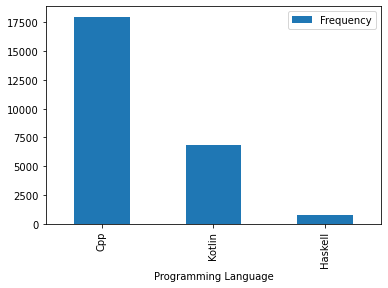

In [31]:
languageCounts = [('Cpp',countCpp2021),('Kotlin',countKotlin2021),('Haskell',countHaskell2021)]
langDf = pd.DataFrame(languageCounts, columns = ['Programming Language','Frequency'])
langDf.plot(kind='bar',x='Programming Language')